# Import basic libraries and get data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

X_train_raw: np.ndarray = np.load('data/X_train.npy')
X_test_raw: np.ndarray = np.load('data/X_test.npy')

y_train_raw = pd.read_csv('data/y_train.csv', index_col=0).to_numpy().flatten()

# Explore data

## Visualize values

In [9]:
print(X_train_raw.shape)
print(X_test_raw.shape)
print(y_train_raw.shape)

(1663, 768)
(713, 768)
(1663,)


In [14]:
for i in range(5):
    print(X_train_raw[i])

[-0.06471267  0.02055361 -0.06917297 -0.02817415 -0.06383458 -0.05415804
 -0.05631668  0.00103642 -0.03830095 -0.02795698 -0.00887127 -0.05955196
 -0.05847407 -0.03056328 -0.01523622  0.00203194  0.00172005 -0.01956727
 -0.0477995  -0.01023453  0.00207263 -0.06738619  0.03800175 -0.03902153
 -0.02849822 -0.03535487 -0.00643702  0.01986    -0.01383646 -0.04002516
 -0.01487604 -0.03730438 -0.0396935  -0.00850522 -0.0346518  -0.03143629
  0.01887847 -0.05474911 -0.03006117  0.01361595 -0.04910322 -0.06519393
 -0.02580466 -0.0432182  -0.04329888 -0.01712367  0.0059582   0.00490008
  0.01049228  0.0216376  -0.02118331 -0.02987012  0.02169864 -0.06931426
 -0.02071577 -0.03517222  0.03565738 -0.0348542  -0.01920113 -0.03192739
 -0.05333946 -0.00254015 -0.04766734 -0.04834326 -0.0077791  -0.00380893
 -0.02181305 -0.0477345  -0.0341493  -0.02076419  0.02175941 -0.05369135
 -0.0169728  -0.00708565  0.01718261  0.02363192 -0.02102587 -0.01815514
 -0.02125221 -0.04238427  0.03916164 -0.04585986 -0

In [15]:
print(y_train_raw[:100])

[ 8 44 11 24  5  8 11 24 29 13 26 27 27 30 20  7 24  5 41 23  5  5 26 11
 10  3 10  8 14 18 26 20 27  8 28 24  7  2  2  2 42  0 24 32 11 43  9  0
 11 15 31 12 10 38  5 29  8  7  7 13 25 24 39 15 41  5  5  7 24 13 11  1
 20 34  8 36 19 27 34 23 11 38 35 13 34 17 24 11 11 19 33  1  5 38  5 21
 13 13 37 25]


In [19]:
print(np.sum(np.square(X_train_raw[1])))

1.0


## Visualize distribution

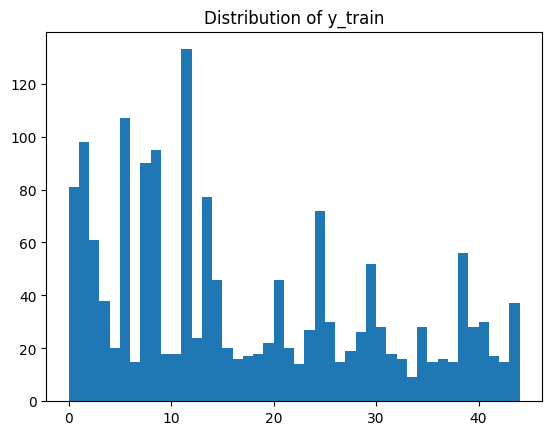

In [17]:
plt.hist(y_train_raw, bins=range(45))
plt.title('Distribution of y_train')
plt.show()

## Visualize Embeddings

[0.05475493 0.0363186 ]


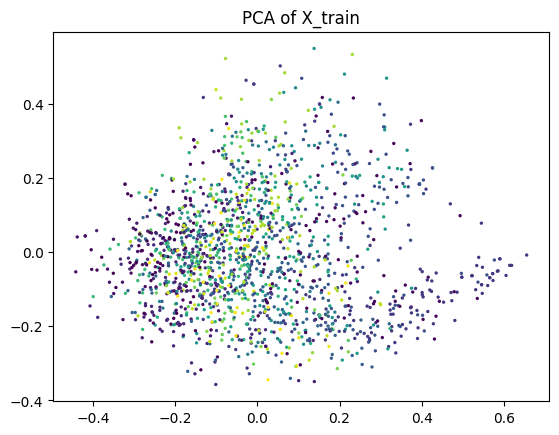

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_raw)
print(pca.explained_variance_ratio_)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], s=2, c=y_train_raw)
plt.title('PCA of X_train')
plt.show()


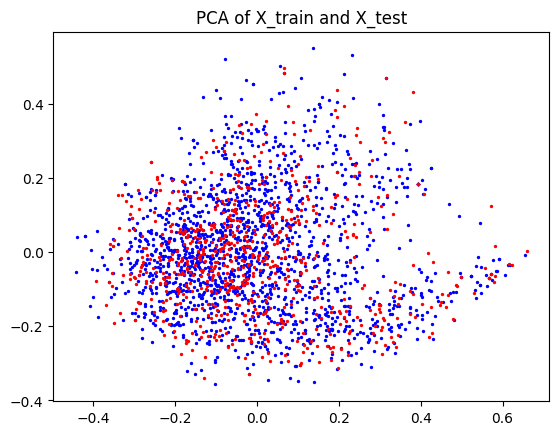

In [26]:

X_test_pca = pca.transform(X_test_raw)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], s=2, color='blue', label='train')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], s=2, color='red', label='test')
plt.title('PCA of X_train and X_test')
plt.show()

c:\Users\cleme\Desktop\DTY\stage\sinch-intent-detection\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\cleme\Desktop\DTY\stage\sinch-intent-detection\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


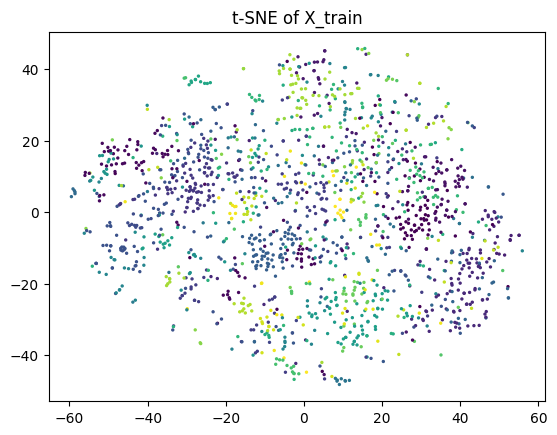

In [27]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train_raw)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], s=2, c=y_train_raw)
plt.title('t-SNE of X_train')
plt.show()

# Algorithms

- K-nn cosine similarity
- XGBoost

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_train_raw, y_train_raw, test_size=0.2, random_state=42, stratify=y_train_raw)

print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(1330, 768) (333, 768) (1330,) (333,)


## KNN 

Cosine similarity is equivalent to L2 distance in the normalized space.

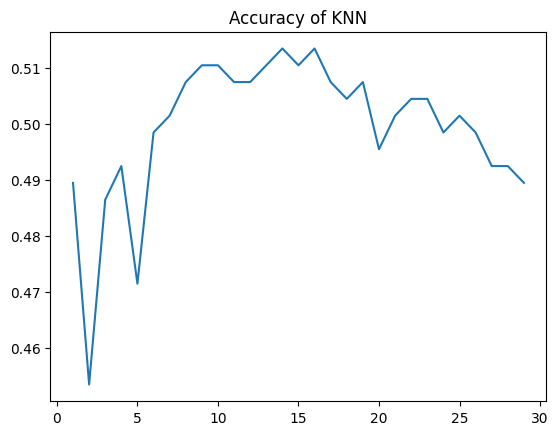

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_list = list(range(1, 30))
accuracy = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_val)
    accuracy.append(accuracy_score(y_val, y_pred))

plt.plot(k_list, accuracy)
plt.title('Accuracy of KNN')
plt.show()



## XGBoost

In [42]:
from sklearn.metrics import f1_score
import xgboost as xgb


def f1_eval(y_pred, dtrain):
    y_pred = np.argmax(y_pred, axis=1)
    y_true = dtrain.get_label()
    
    err = f1_score(y_true, np.round(y_pred), average="weighted")
    return 'f1_err', 1-err

def f1_macro(y_pred, dtrain):
    y_pred = np.argmax(y_pred, axis=1)
    y_true = dtrain.get_label()
    
    err = f1_score(y_true, np.round(y_pred), average="macro")
    return 'f1_err', 1-err


def train_xgb(x_train, y_train, x_val, y_val, params):
    params = params.copy()

    early_stopping_rounds = params.pop('early_stopping_rounds', None)
    num_boost_round = params.pop('num_boost_round', 1000)

    dtrain = xgb.DMatrix(x_train, label=y_train)
    dval = xgb.DMatrix(x_val, label=y_val)

    watchlist = [(dtrain, "train"), (dval, "val")]
    
    model = xgb.train(
        params=params,
        dtrain=dtrain,
        early_stopping_rounds=early_stopping_rounds,  
        num_boost_round=num_boost_round,
        evals=watchlist,
        custom_metric=f1_macro,
        maximize=False,
        verbose_eval=1,
    )

    y_val_pred = np.argmax(model.predict(dval), axis=1)

    print("F1 score weighted : ", f1_score(y_val, y_val_pred, average="weighted"))
    print("F1 score macro : ", f1_score(y_val, y_val_pred, average="macro"))

    return model


In [45]:
params = params = {
    'objective': 'multi:softprob',
    'sampling_method': 'gradient_based',
    'grow_policy': 'lossguide',

    'num_class': 45,

    'num_boost_round': 10,

    'max_depth': 2,
    # 'learning_rate': 0.1,
    # 'early_stopping_rounds': 2, 
    # 'reg_lambda': 1, 
    # 'reg_alpha': 1.2e-04, 
    # "gamma": 2.5,
    # 'subsample': 0.7, 
    # 'colsample_bytree': 0, 

    'tree_method': 'gpu_hist',
    'predictor': 'gpu_predictor',

    'seed': 42,
    'verbosity': 1
}

train_xgb(x_train, y_train, x_val, y_val, params)

[0]	train-mlogloss:2.78055	train-f1_err:0.63248	val-mlogloss:3.15312	val-f1_err:0.81611
[1]	train-mlogloss:2.30132	train-f1_err:0.48420	val-mlogloss:2.88815	val-f1_err:0.79820
[2]	train-mlogloss:1.93582	train-f1_err:0.31946	val-mlogloss:2.70129	val-f1_err:0.78114
[3]	train-mlogloss:1.65598	train-f1_err:0.24009	val-mlogloss:2.56457	val-f1_err:0.72954
[4]	train-mlogloss:1.43548	train-f1_err:0.17628	val-mlogloss:2.44681	val-f1_err:0.69619
[5]	train-mlogloss:1.25661	train-f1_err:0.13894	val-mlogloss:2.35634	val-f1_err:0.68470
[6]	train-mlogloss:1.10535	train-f1_err:0.10949	val-mlogloss:2.29055	val-f1_err:0.64436
[7]	train-mlogloss:0.97499	train-f1_err:0.07422	val-mlogloss:2.22922	val-f1_err:0.64538
[8]	train-mlogloss:0.86565	train-f1_err:0.05557	val-mlogloss:2.17127	val-f1_err:0.62179
[9]	train-mlogloss:0.77331	train-f1_err:0.04303	val-mlogloss:2.11566	val-f1_err:0.62393
F1 score weighted :  0.45394530919047466
F1 score macro :  0.3760676589409947


## Deep learning

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Embedding, LSTM, Conv1D, MaxPooling1D, Flatten
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.regularizers import L1, L2, L1L2
from keras.utils import to_categorical

### Playground

In [11]:

# LSTM model
# 0.28 accuracy after 400 epochs
# model = Sequential(
#     [
#         LSTM(64, dropout=0.2, recurrent_dropout=0, input_shape=(768, 1)), 
#         Dense(64, activation="relu"),
#         Dense(45, activation="softmax"),
#     ]
# )

# Double LSTM model
# 0.28 accuracy after 200 epochs
# model = Sequential(
#     [
#         LSTM(64, dropout=0.2, recurrent_dropout=0, input_shape=(768, 1)), #, return_sequences=True),
#         LSTM(64, dropout=0.2, recurrent_dropout=0),
#         Dense(64, activation="relu"),
#         Dense(45, activation="softmax"),
#     ]
# )

# Double Dense model
# full overfitting
# model = Sequential(
#     [
#         Dense(128, activation="relu", input_shape=(768,)),
#         Dense(45, activation="softmax"),
#     ]
# )

# Logistic regression
# Full overfitting
model = Sequential(
    [
        # Dense(128, activation="relu", input_shape=(768,)),
        Dense(45, activation="softmax", input_shape=(768,)),
    ]
)


model.summary()

loss_function = CategoricalCrossentropy(label_smoothing=0.1)
optimizer = Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss=loss_function, metrics=["accuracy"])

model.fit(x_train, to_categorical(y_train), batch_size=512, epochs=30, validation_data=(x_val, to_categorical(y_val)))



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 45)                34605     
                                                                 
Total params: 34,605
Trainable params: 34,605
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
3/3 [==============================] - 1s 86ms/step - loss: 3.4710 - accuracy: 0.2203 - val_loss: 2.6940 - val_accuracy: 0.4444
Epoch 2/30
3/3 [==============================] - 0s 26ms/step - loss: 2.2866 - accuracy: 0.5639 - val_loss: 2.0908 - val_accuracy: 0.6066
Epoch 3/30
3/3 [==============================] - 0s 27ms/step - loss: 1.6719 - accuracy: 0.7541 - val_loss: 1.8913 - val_accuracy: 0.6246
Epoch 4/30
3/3 [==============================] - 0s 28ms/step - loss: 1.4352 - accuracy: 0.7789 - val_loss: 1.8374 - val_accuracy: 0.6096
Epoch 5/30
3/3 [======

### Hyperparameter tuning

All hyperparameters:
- architecture (number of layers, number of neurons per layer)
- learning rate 
- label smoothing 
- kernel regularizer L1 and L2 
- dropout 



- batch size is fixed to maximum value
- number of epochs is fixed to 300 with early stopping 

In [10]:
from keras import backend as K
from keras.callbacks import ModelCheckpoint
import os
import shutil
from tensorflow_addons.metrics import F1Score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
import random


def get_regularizer(l1=None, l2=None):
    match l1, l2:
        case (None, None):
            return None

        case (l1, None):
            return L1(l1)

        case (None, l2):
            return L2(l2)

        case (l1, l2):
            return L1L2(l1, l2)


def get_one_layer_model(l1, l2, dropout):
    model = Sequential(
        [
            Dense(
                45,
                activation="softmax",
                input_shape=(768,),
                kernel_regularizer=get_regularizer(l1, l2),
                bias_regularizer=get_regularizer(l1, l2),
            ),
        ]
    )

    return model


def get_two_layer_model(number_of_neurons, l1, l2, dropout):
    model = Sequential(
        [
            Dense(
                number_of_neurons,
                activation="relu",
                input_shape=(768,),
                kernel_regularizer=get_regularizer(l1, l2),
                bias_regularizer=get_regularizer(l1, l2),
            ),
            Dropout(dropout),
            Dense(
                45,
                activation="softmax",
                kernel_regularizer=get_regularizer(l1, l2),
                bias_regularizer=get_regularizer(l1, l2),
            ),
        ]
    )

    return model


def get_three_layer_model(number_of_neurons, number_of_neurons2, l1, l2, dropout):
    model = Sequential(
        [
            Dense(
                number_of_neurons,
                activation="relu",
                input_shape=(768,),
                kernel_regularizer=get_regularizer(l1, l2),
                bias_regularizer=get_regularizer(l1, l2),
            ),
            Dropout(dropout),
            Dense(
                number_of_neurons2,
                activation="relu",
                kernel_regularizer=get_regularizer(l1, l2),
                bias_regularizer=get_regularizer(l1, l2),
            ),
            Dropout(dropout),
            Dense(
                45,
                activation="softmax",
                kernel_regularizer=get_regularizer(l1, l2),
                bias_regularizer=get_regularizer(l1, l2),
            ),
        ]
    )

    return model


def create_model(
    number_of_layers,
    number_of_neurons=None,
    number_of_neurons2=None,
    l1=None,
    l2=None,
    dropout=None,
):
    match number_of_layers:
        case 1:
            return get_one_layer_model(l1, l2, dropout)

        case 2:
            return get_two_layer_model(number_of_neurons, l1, l2, dropout)

        case 3:
            return get_three_layer_model(
                number_of_neurons, number_of_neurons2, l1, l2, dropout
            )

        case _:
            raise ValueError("Number of layers must be 1, 2 or 3")


def get_params_suffix(params):
    return "-".join([f"{key}-{value}" for key, value in params.items()])


def parse_score(save_folder):
    files = os.listdir(save_folder)
    max_val = 0
    max_train = 0
    max_file = None
    for file in files:
        if file.endswith(".h5"):
            parsed = file[:-3].split("-")
            if (score := float(parsed[0])) > max_val:
                max_val = score
                max_train = float(parsed[1])
                max_file = file

    if max_file is None:
        raise ValueError("No file found")

    return max_val, max_train, max_file


def load_experiment_records(experiment_type):
    file_path = f"experiments/{experiment_type}/records.csv"
    if not os.path.exists(file_path):
        return pd.DataFrame()

    return pd.read_csv(file_path)


def save_experiment_records(experiment_type, records):
    folder = f"experiments/{experiment_type}"
    if not os.path.exists(folder):
        os.makedirs(folder)

    records.to_csv(f"{folder}/records.csv", index=False)


def run_experiment(
    x_train,
    y_train_one_hot,
    x_val,
    y_val_one_hot,
    params,
    save_folder="temp",
    verbose="auto",
):
    if os.path.exists(save_folder):
        shutil.rmtree(save_folder)
    os.makedirs(save_folder)

    model = create_model(
        params.get("number_of_layers", 1),
        number_of_neurons=params.get("number_of_neurons", 128),
        number_of_neurons2=params.get("number_of_neurons2", 64),
        l1=params.get("l1", None),
        l2=params.get("l2", None),
        dropout=params.get("dropout", 0.2),
    )

    loss_function = CategoricalCrossentropy(
        label_smoothing=params.get("label_smoothing", 0)
    )
    optimizer = Adam(learning_rate=params.get("learning_rate", 0.01))

    checkpoint_filepath = os.path.join(
        save_folder, "{val_f1_score:.4f}-{f1_score:.4f}.h5"
    )

    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        monitor="val_f1_score",
        mode="max",
        save_best_only=True,
    )

    model.compile(
        optimizer=optimizer,
        loss=loss_function,
        metrics=["accuracy", F1Score(num_classes=45, average="micro", threshold=None)],
    )

    model.fit(
        x_train,
        y_train_one_hot,
        batch_size=512,
        epochs=30,
        validation_data=(x_val, y_val_one_hot),
        callbacks=[model_checkpoint_callback],
        verbose=verbose,
    )

    max_val, max_train, max_file = parse_score(save_folder)

    model.load_weights(os.path.join(save_folder, max_file))

    return model, max_val, max_train


def run_kfold_experiments(
    x_train_raw, y_train_raw, x_test_raw, params, experiment_type, k=5, params_id=None
):
    stratified_kfold = StratifiedKFold(n_splits=k)

    current_records = []

    for fold_number, (train_index, val_index) in enumerate(
        stratified_kfold.split(x_train_raw, y_train_raw)
    ):
        x_train, x_val = x_train_raw[train_index], x_train_raw[val_index]
        y_train, y_val = y_train_raw[train_index], y_train_raw[val_index]

        y_train_one_hot = to_categorical(y_train)
        y_val_one_hot = to_categorical(y_val)

        model, val_f1, train_f1 = run_experiment(
            x_train, y_train_one_hot, x_val, y_val_one_hot, params, verbose=0
        )

        print(
            f"params_id {params_id} - fold {fold_number}: val f1 {val_f1} - train f1 {train_f1}"
        )

        current_records.append(
            {
                "params_id": params_id,
                "fold_number": fold_number,
                "val_f1": val_f1,
                "train_f1": train_f1,
                **params,
            }
        )

        y_pred = model.predict(x_test_raw)
        np.save(f"experiments/{experiment_type}/{params_id}-{fold_number}", y_pred)

    records = load_experiment_records(experiment_type)

    records = pd.concat([records, pd.DataFrame(current_records)])

    save_experiment_records(experiment_type, records)


def run_random_search(
    x_train_raw,
    y_train_raw,
    x_test_raw,
    experiment_type,
    params_grid,
    number_folds=5,
    number_experiments=100,
):
    if not os.path.exists(f"experiments/{experiment_type}"):
        os.makedirs(f"experiments/{experiment_type}")

    if isinstance(params_grid, dict):
        params_grid = [params_grid]

    params_list = []
    for params_patern in params_grid:
        grid_params = list(ParameterGrid(params_patern))
        random.shuffle(grid_params)
        grid_params = grid_params[:number_experiments]
        params_list.extend(grid_params)

    for params_id, params in enumerate(params_list):
        run_kfold_experiments(
            x_train_raw,
            y_train_raw,
            x_test_raw,
            params,
            experiment_type,
            k=number_folds,
            params_id=params_id,
        )


Examples of use 

In [ ]:
params = {
    "number_of_layers": 1,
    "number_of_neurons": 128,
    "number_of_neurons2": 64,
    "l1": 0.0001,
    "l2": 0.0001,
    "dropout": 0.2,
    "learning_rate": 0.1,
    "label_smoothing": 0.1,
}

model, val_f1, train_f1 = run_experiment(x_train, to_categorical(y_train, 45), x_val, to_categorical(y_val, 45), params)

In [4]:
params = {
    "number_of_layers": 2,
    "number_of_neurons": 128,
    "number_of_neurons2": None,
    "l1": 0.0001,
    "l2": 0.0001,
    "dropout": 0.2,
    "learning_rate": 0.1,
    "label_smoothing": 0.1,
}

run_kfold_experiments(X_train_raw, y_train_raw, X_test_raw, params, experiment_type="test", params_id=0)
run_kfold_experiments(X_train_raw, y_train_raw, X_test_raw, params, experiment_type="test", params_id=1)


params_id 0 - fold 0: val f1 0.6577 - train f1 0.7865
23/23 [==============================] - 0s 2ms/step
params_id 0 - fold 1: val f1 0.6036 - train f1 0.7857
23/23 [==============================] - 0s 2ms/step
params_id 0 - fold 2: val f1 0.6036 - train f1 0.7609
23/23 [==============================] - 0s 2ms/step
params_id 0 - fold 3: val f1 0.6084 - train f1 0.7581
23/23 [==============================] - 0s 3ms/step
params_id 0 - fold 4: val f1 0.6235 - train f1 0.737
23/23 [==============================] - 0s 2ms/step
params_id 2 - fold 0: val f1 0.6456 - train f1 0.8158
23/23 [==============================] - 0s 2ms/step
params_id 2 - fold 1: val f1 0.6276 - train f1 0.7955
23/23 [==============================] - 0s 2ms/step
params_id 2 - fold 2: val f1 0.6096 - train f1 0.7895
23/23 [==============================] - 0s 2ms/step
params_id 2 - fold 3: val f1 0.6325 - train f1 0.7708
23/23 [==============================] - 0s 2ms/step
params_id 2 - fold 4: val f1 0.5994 - 

In [11]:
possible_params = [
    {
        "number_of_layers": [1],
        "l1": [None, 0.0001, 0.0004],
        "l2": [None, 0.0001, 0.0004],
        "learning_rate": [0.01, 0.05, 0.1],
        "label_smoothing": [0, 0.1, 0.15],
    },
    {
        "number_of_layers": [2],
        "number_of_neurons": [64, 128, 256],
        "dropout": [0, 0.1, 0.2, 0.3],
        "l1": [None, 0.0001, 0.0004],
        "l2": [None, 0.0001, 0.0004],
        "learning_rate": [0.01, 0.05, 0.1],
        "label_smoothing": [0, 0.1, 0.15],
    },
    {
        "number_of_layers": [3],
        "number_of_neurons": [64, 128, 256],
        "number_of_neurons2": [64, 128],
        "dropout": [0, 0.1, 0.2, 0.3],
        "l1": [None, 0.0001, 0.0004],
        "l2": [None, 0.0001, 0.0004],
        "learning_rate": [0.01, 0.05, 0.1],
        "label_smoothing": [0, 0.1, 0.15],
    },
]

run_random_search(
    X_train_raw,
    y_train_raw,
    X_test_raw,
    experiment_type="raw_data",
    params_grid=possible_params,
    number_folds=5,
    number_experiments=100,
)


params_id 0 - fold 0: val f1 0.4655 - train f1 0.4338
23/23 [==============================] - 0s 2ms/step
params_id 0 - fold 1: val f1 0.4234 - train f1 0.4308
23/23 [==============================] - 0s 2ms/step
params_id 0 - fold 2: val f1 0.4324 - train f1 0.4504
23/23 [==============================] - 0s 2ms/step
params_id 0 - fold 3: val f1 0.4277 - train f1 0.435
23/23 [==============================] - 0s 2ms/step
params_id 0 - fold 4: val f1 0.4127 - train f1 0.4335
23/23 [==============================] - 0s 2ms/step
params_id 1 - fold 0: val f1 0.5526 - train f1 0.5233
23/23 [==============================] - 0s 2ms/step
params_id 1 - fold 1: val f1 0.5015 - train f1 0.4902
23/23 [==============================] - 0s 3ms/step
params_id 1 - fold 2: val f1 0.4805 - train f1 0.5263
23/23 [==============================] - 0s 2ms/step
params_id 1 - fold 3: val f1 0.5331 - train f1 0.5124
23/23 [==============================] - 0s 2ms/step
params_id 1 - fold 4: val f1 0.5663 - 